In [40]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import pickle as pkl
import os, sys
import numpy as np
import matplotlib.pyplot as plt
#Change the resolution of the plots
plt.rcParams['figure.dpi']= 200

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# <font color="darkmagenta"> Upper limits </font>

In [41]:
channels = ["WW","bb","tautau","mumu","nuenue","numunumu","nutaunutau"]
ch_title = {"WW":r"$W^+ W^-$","bb":r"$b\bar{b}$","tautau":r"$\tau \bar{\tau}$", "mumu":r"$\mu^+\mu^-$","nuenue":r"$\nu_e \bar{\nu}_e$","numunumu":r'$\nu_\mu \bar{\nu}_\mu$',"nutaunutau":r"$\nu_\tau \bar{\nu}_\tau$"}
cols = {"WW":"purple","bb":"darkturquoise","tautau":'dodgerblue', "mumu":"green","nuenue":"hotpink","numunumu":'deeppink',"nutaunutau":"pink"}
# channels = ["bb"]

profile = ['NFW', 'Burkert']
filepath = '/data/user/tchau/Sandbox/GC_OscNext/Sensitivity/UpperLimit/'
file = os.listdir(filepath)

WW_Burkert_30points_MC1122_BKGFFT_ULbybisection.pkl
bb_Burkert_30points_MC1122_BKGFFT_ULbybisection.pkl
tautau_Burkert_30points_MC1122_BKGFFT_ULbybisection.pkl
mumu_Burkert_30points_MC1122_BKGFFT_ULbybisection.pkl
nuenue_Burkert_30points_MC1122_BKGFFT_ULbybisection.pkl
numunumu_Burkert_30points_MC1122_BKGFFT_ULbybisection.pkl
nutaunutau_Burkert_30points_MC1122_BKGFFT_ULbybisection.pkl


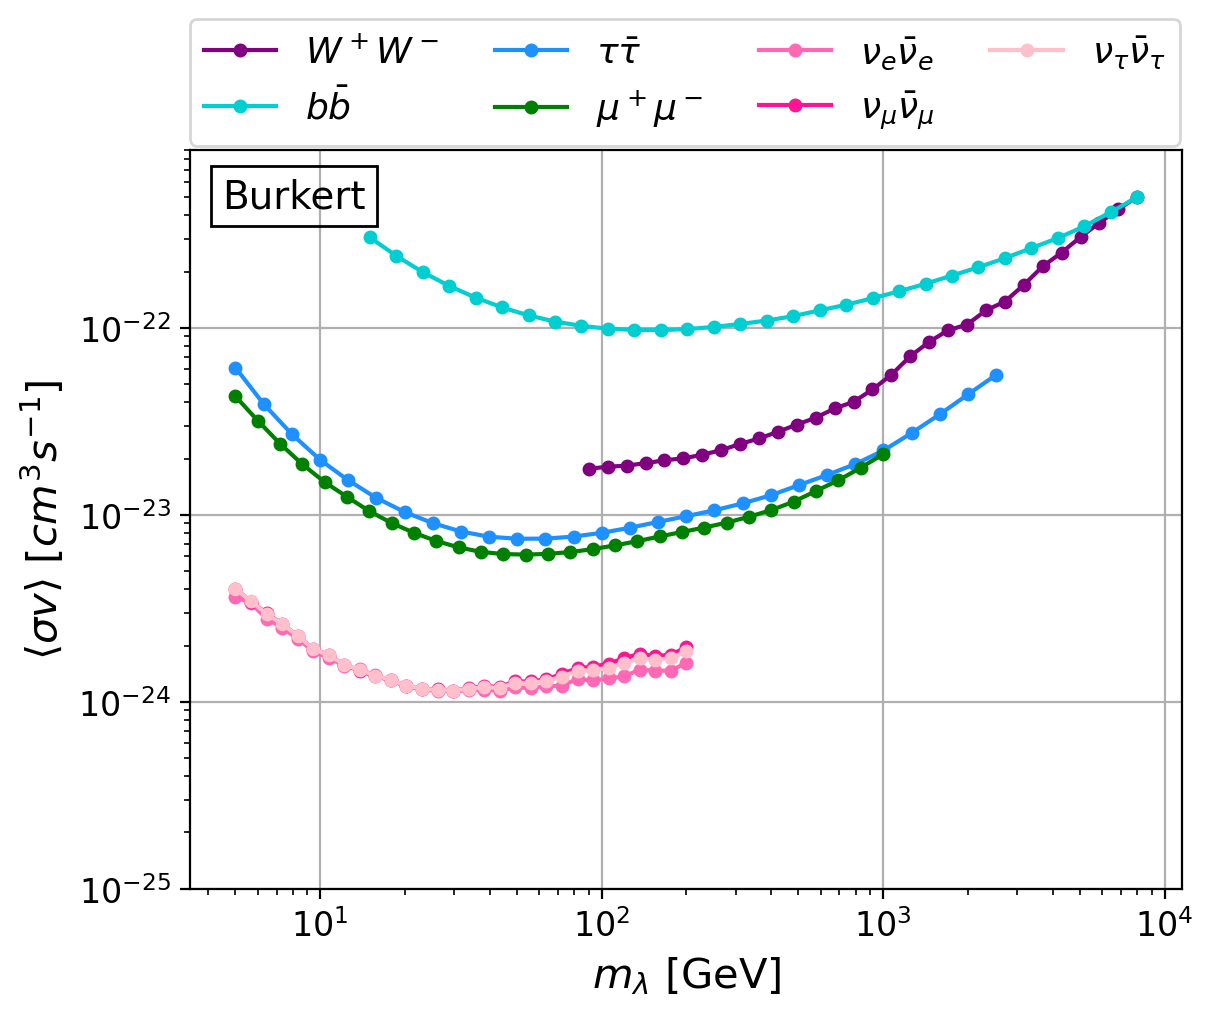

In [46]:
profile = 'Burkert'
for ch in channels:
    path = [file[i] for i in range(len(file)) if (ch +"_"+ profile in file[i] and '30points_MC1122_BKGFFT_ULbybisection.pkl' in file[i])]
    if len(path)==0: continue
    print(path[0])
    UL = pkl.load(open(filepath+path[0], "rb"))
    if ch=='tautau':
        plt.plot(UL['mass'][0:-2], UL['UL'][0:-2], marker='o', label=ch_title[ch], color=cols[ch], markersize=4)
    else:    
        plt.plot(UL['mass'], UL['UL'], marker='o',label=ch_title[ch], color=cols[ch], markersize=4)        

# UL = pkl.load(open('/data/user/tchau/Sandbox/GC_OscNext/Sensitivity/UpperLimit/WW_NFW_10_testv1.pkl', "rb"))
# plt.plot(UL['mass'], UL['UL'], marker='o',label='WW-new', color='gray')    

plt.semilogy()
plt.semilogx()
plt.ylim(1e-25, 9e-22)
plt.legend(ncol=4, bbox_to_anchor=(-0.019, 1.1, 1.035, 0.101), loc='upper left', mode="expand", fontsize=13)
plt.ylabel(r'$\langle \sigma v \rangle$'+r' $[cm^3 s^{-1}]$', fontsize=15)
plt.xlabel(r'$m_{\lambda}$'+' [GeV]', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.figtext(0.15,0.82,profile, bbox=dict(facecolor='none', edgecolor='black'), fontsize=14)
plt.grid()


# <font color="darkmagenta"> Systematics </font>

WW_NFW_30points_MC1122_BKGFFT_ULbybisection.pkl
WW_NFW_30points_MC1124_BKGFFT_ULbybisection.pkl
WW_NFW_30points_MC1125_BKGFFT_ULbybisection.pkl
WW_NFW_30points_MC1126_BKGFFT_ULbybisection.pkl
WW_NFW_30points_MC1127_BKGFFT_ULbybisection.pkl
WW_NFW_30points_MC1128_BKGFFT_ULbybisection.pkl
WW_NFW_30points_MC1129_BKGFFT_ULbybisection.pkl
WW_NFW_30points_MC1130_BKGFFT_ULbybisection.pkl
WW_NFW_30points_MC1131_BKGFFT_ULbybisection.pkl
WW_NFW_30points_MC1132_BKGFFT_ULbybisection.pkl
WW_NFW_30points_MC1133_BKGFFT_ULbybisection.pkl
WW_NFW_30points_MC0000_BKGFFT_ULbybisection.pkl
WW_NFW_30points_MC1122_BKGFFT_ULbybisection.pkl
WW_NFW_30points_MC1124_BKGFFT_ULbybisection.pkl
WW_NFW_30points_MC1125_BKGFFT_ULbybisection.pkl
WW_NFW_30points_MC1126_BKGFFT_ULbybisection.pkl
WW_NFW_30points_MC1127_BKGFFT_ULbybisection.pkl
WW_NFW_30points_MC1128_BKGFFT_ULbybisection.pkl
WW_NFW_30points_MC1129_BKGFFT_ULbybisection.pkl
WW_NFW_30points_MC1130_BKGFFT_ULbybisection.pkl
WW_NFW_30points_MC1131_BKGFFT_ULbybisect

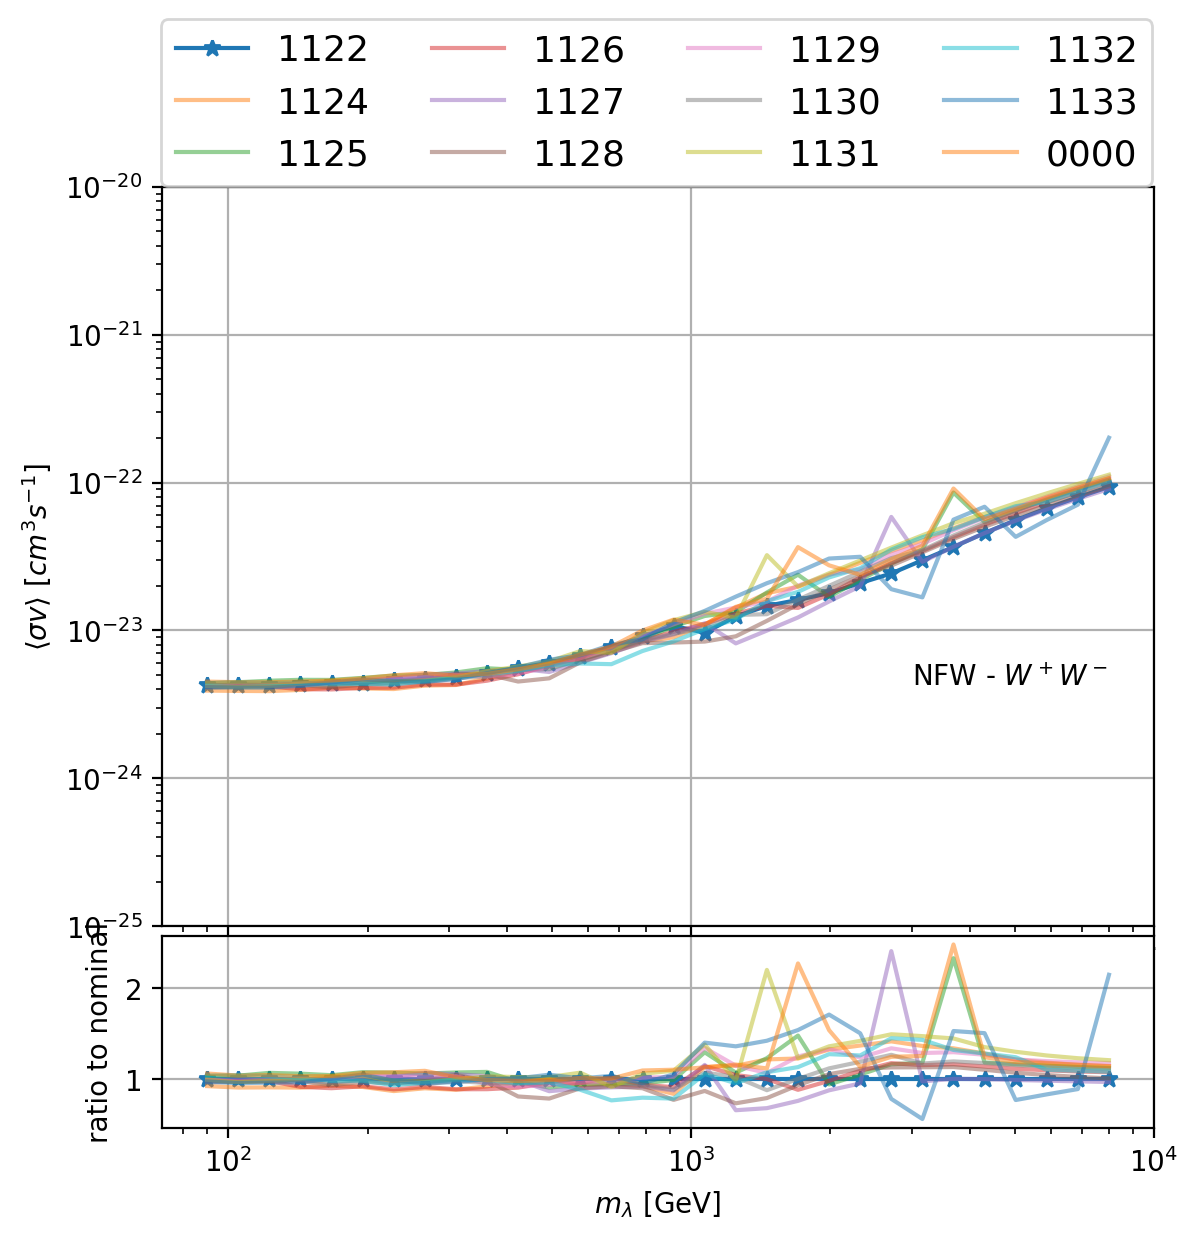

In [49]:
#  Now let do the systematics effect!

channel = 'WW'
profile = 'NFW'
sys=['1122', '1124', '1125', '1126', '1127', '1128', '1129', '1130', '1131', '1132', '1133', '0000']

fig, ax = plt.subplots()
for s in sys:
    path = [file[i] for i in range(len(file)) if (channel +"_"+ profile in file[i] and '30points_MC{}_BKGFFT_ULbybisection'.format(s) in file[i])]
    if len(path)==0: continue
    print(path[0])
    UL = pkl.load(open(filepath+path[0], "rb"))
    if s == '1122':
        alpha = 1.
        marker='*'
        x_base, y_base = UL['mass'], UL['UL']
    else:
        alpha = 0.5
        marker=''
    if channel=='bb':
        ax.plot(UL['mass'][1:-1], UL['UL'][1:-1], label=s, alpha=alpha, marker=marker)
    else:    
        ax.plot(UL['mass'], UL['UL'],label=s, alpha=alpha, marker=marker)       

ax.legend(ncol=4, bbox_to_anchor=(-0.019, 1.15, 1.035, 0.101), loc='upper left', mode="expand", fontsize=13)
ax.set_xticklabels([], fontsize=0)
# ax.set_yticklabels(ax.get_yticks(),rotation=45)

ax.set(ylabel=r'$\langle \sigma v \rangle$'+r' $[cm^3 s^{-1}]$')


ax.semilogy()
ax.semilogx()

ax.set_ylim(1e-25, 1e-20)
ax.grid()

ax.text(3000, 6e-24, profile + ' - ' + ch_title[channel], ha='left', va='top')

# Ratio plot!
ax2 = fig.add_subplot(1, 1, 1, sharex=ax)
# fig.subplots_adjust(hspace=0.)
ax2.set_position([0.125, -0.1, 0.775, 0.2])
for s in sys:
    path = [file[i] for i in range(len(file)) if (channel +"_"+ profile in file[i] and '30points_MC{}_BKGFFT_ULbybisection'.format(s) in file[i])]
    if len(path)==0: continue
    print(path[0])
    UL = pkl.load(open(filepath+path[0], "rb"))
    if s == '1122':
        alpha = 1.
        marker='*'
        x_base, y_base = UL['mass'], UL['UL']
    else:
        alpha = 0.5
        marker=''
    if channel=='bb':
        ax2.plot(UL['mass'][1:-1], UL['UL'][1:-1]/y_base[1:-1], label=s, alpha=alpha, marker=marker)
    else:    
        ax2.plot(UL['mass'], UL['UL']/y_base,label=s, alpha=alpha, marker=marker)   
# ax.semilogy()
ax2.semilogx()
ax2.set(xlabel=r'$m_{\lambda}$'+' [GeV]', ylabel=r'ratio to nominal')
ax2.grid()


bb_NFW_30points_MC1122_BKGFFT_ULbybisection.pkl
bb_NFW_30points_MC1124_BKGFFT_ULbybisection.pkl
bb_NFW_30points_MC1125_BKGFFT_ULbybisection.pkl
bb_NFW_30points_MC1126_BKGFFT_ULbybisection.pkl
bb_NFW_30points_MC1127_BKGFFT_ULbybisection.pkl
bb_NFW_30points_MC1128_BKGFFT_ULbybisection.pkl
bb_NFW_30points_MC1129_BKGFFT_ULbybisection.pkl
bb_NFW_30points_MC1130_BKGFFT_ULbybisection.pkl
bb_NFW_30points_MC1131_BKGFFT_ULbybisection.pkl
bb_NFW_30points_MC1132_BKGFFT_ULbybisection.pkl
bb_NFW_30points_MC1133_BKGFFT_ULbybisection.pkl
bb_NFW_30points_MC0000_BKGFFT_ULbybisection.pkl
bb_NFW_30points_MC1122_BKGFFT_ULbybisection.pkl
bb_NFW_30points_MC1124_BKGFFT_ULbybisection.pkl
bb_NFW_30points_MC1125_BKGFFT_ULbybisection.pkl
bb_NFW_30points_MC1126_BKGFFT_ULbybisection.pkl
bb_NFW_30points_MC1127_BKGFFT_ULbybisection.pkl
bb_NFW_30points_MC1128_BKGFFT_ULbybisection.pkl
bb_NFW_30points_MC1129_BKGFFT_ULbybisection.pkl
bb_NFW_30points_MC1130_BKGFFT_ULbybisection.pkl
bb_NFW_30points_MC1131_BKGFFT_ULbybisect

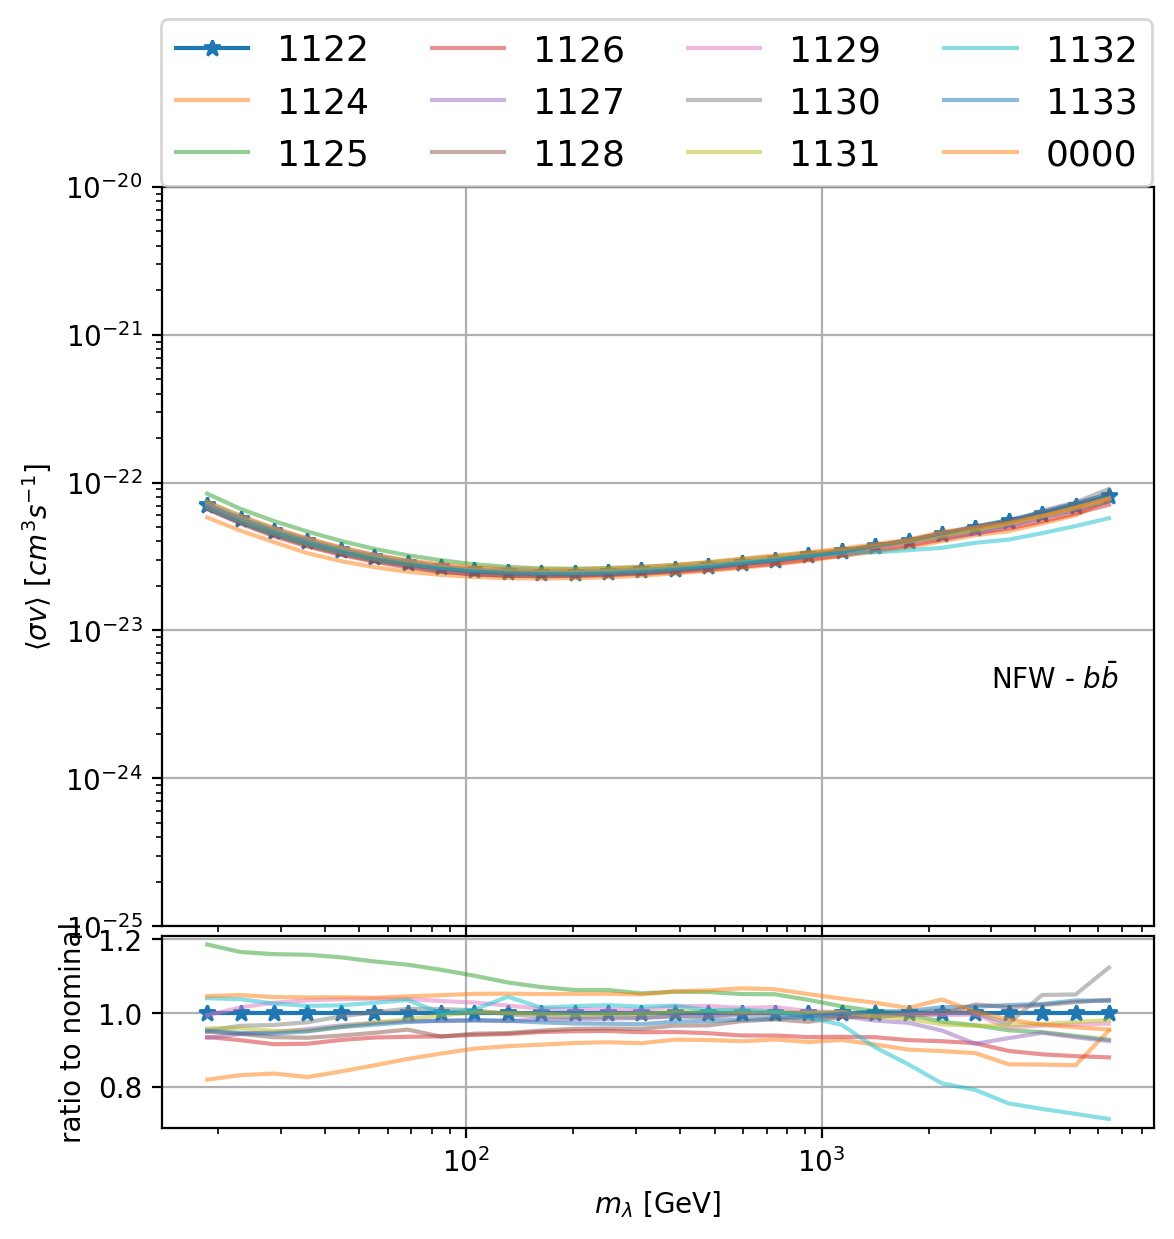

In [48]:
#  Now let do the systematics effect!

channel = 'bb'
profile = 'NFW'
sys=['1122', '1124', '1125', '1126', '1127', '1128', '1129', '1130', '1131', '1132', '1133', '0000']

fig, ax = plt.subplots()
for s in sys:
    path = [file[i] for i in range(len(file)) if (channel +"_"+ profile in file[i] and '30points_MC{}_BKGFFT_ULbybisection'.format(s) in file[i])]
    if len(path)==0: continue
    print(path[0])
    UL = pkl.load(open(filepath+path[0], "rb"))
    if s == '1122':
        alpha = 1.
        marker='*'
        x_base, y_base = UL['mass'], UL['UL']
    else:
        alpha = 0.5
        marker=''
    if channel=='bb':
        ax.plot(UL['mass'][1:-1], UL['UL'][1:-1], label=s, alpha=alpha, marker=marker)
    else:    
        ax.plot(UL['mass'], UL['UL'],label=s, alpha=alpha, marker=marker)       

ax.legend(ncol=4, bbox_to_anchor=(-0.019, 1.15, 1.035, 0.101), loc='upper left', mode="expand", fontsize=13)
ax.set_xticklabels([], fontsize=0)
# ax.set_yticklabels(ax.get_yticks(),rotation=45)

ax.set(ylabel=r'$\langle \sigma v \rangle$'+r' $[cm^3 s^{-1}]$')
# ax.ylabel(r'$\langle \sigma v \rangle$'+r' $[cm^3 s^{-1}]$', fontsize=15)
# ax.xlabel(r'$m_{\lambda}$'+' [GeV]', fontsize=15)
# ax.xticks(fontsize=12)
# ax.yticks(fontsize=12)
# ax.figtext(0.15,0.82,profile + ' - '+ channel, bbox=dict(facecolor='none', edgecolor='black'), fontsize=14)
ax.semilogy()
ax.semilogx()

ax.set_ylim(1e-25, 1e-20)
ax.grid()

ax.text(3000, 6e-24, profile + ' - ' + ch_title[channel], ha='left', va='top')

# Ratio plot!
ax2 = fig.add_subplot(1, 1, 1, sharex=ax)
# fig.subplots_adjust(hspace=0.)
ax2.set_position([0.125, -0.1, 0.775, 0.2])
for s in sys:
    path = [file[i] for i in range(len(file)) if (channel +"_"+ profile in file[i] and '30points_MC{}_BKGFFT_ULbybisection'.format(s) in file[i])]
    if len(path)==0: continue
    print(path[0])
    UL = pkl.load(open(filepath+path[0], "rb"))
    if s == '1122':
        alpha = 1.
        marker='*'
        x_base, y_base = UL['mass'], UL['UL']
    else:
        alpha = 0.5
        marker=''
    if channel=='bb':
        ax2.plot(UL['mass'][1:-1], UL['UL'][1:-1]/y_base[1:-1], label=s, alpha=alpha, marker=marker)
    else:    
        ax2.plot(UL['mass'], UL['UL']/y_base,label=s, alpha=alpha, marker=marker)   
# ax.semilogy()
ax2.semilogx()
ax2.set(xlabel=r'$m_{\lambda}$'+' [GeV]', ylabel=r'ratio to nominal')
ax2.grid()

# <font color="darkmagenta"> Signal recovery </font>

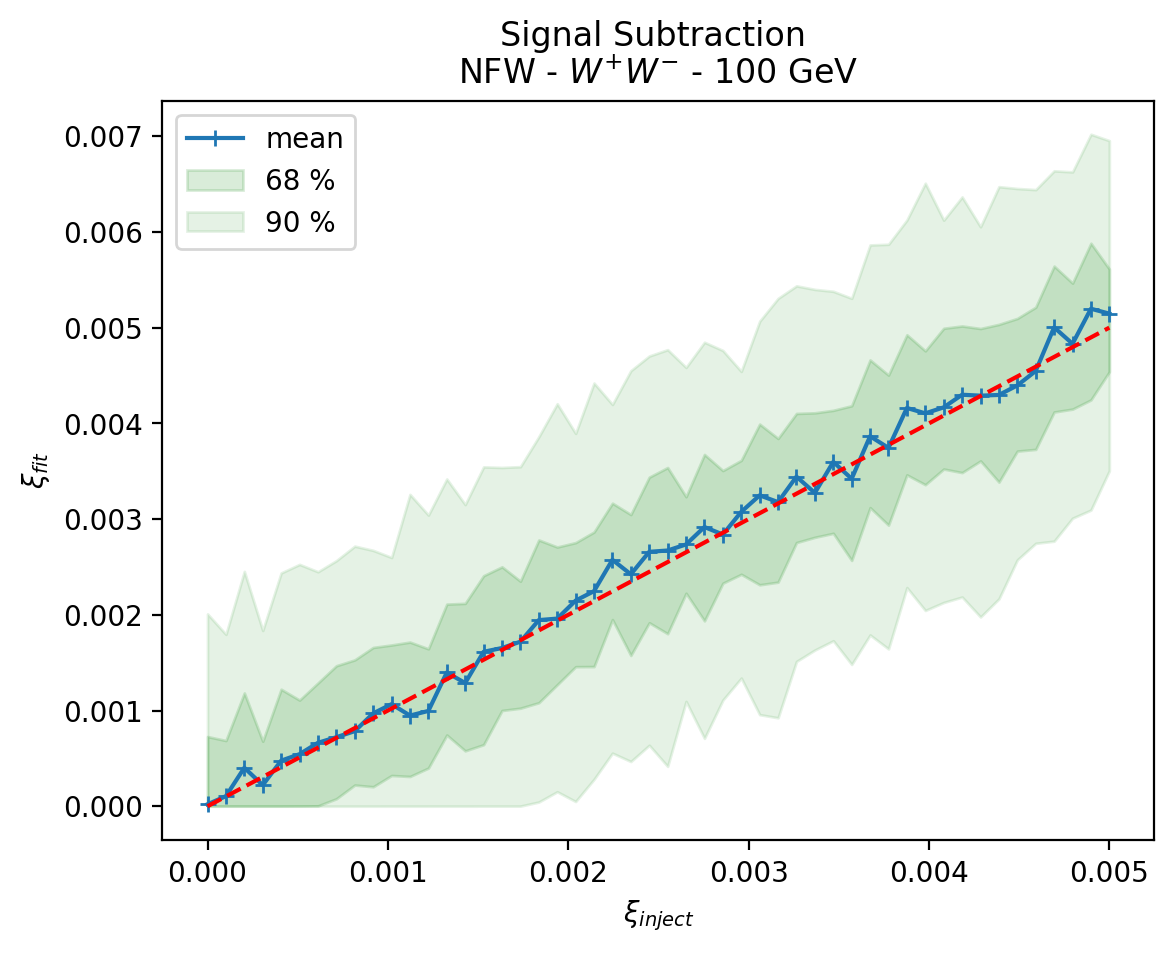

In [50]:
file = '/data/user/tchau/Sandbox/GC_OscNext/Sensitivity/SignalRecovery/WW_NFW_100.0GeV_MCfit1122_MCinj1124_llhSignalSub.pkl'
output = pkl.load(open(file, 'rb'))


f_inj = np.linspace(0, 0.005, 50)

plt.plot(f_inj, output['mean'], marker="+", label='mean')

plt.fill_between(f_inj, output['32'], output['68'], alpha=.15, color='green', label='68 %')
plt.fill_between(f_inj, output['10'], output['90'], alpha=.1, color='green', label='90 %')

plt.title('Signal Subtraction \n'+ r"NFW - $W^{+} W^{-}$" + " - 100 GeV")
plt.plot(f_inj, f_inj, color='red', ls='--')
# plt.xlim(0,0.002)
# plt.ylim(0,0.002)
plt.xlabel(r"$\xi_{inject}$")
plt.ylabel(r"$\xi_{fit}$")
plt.legend(loc=2)

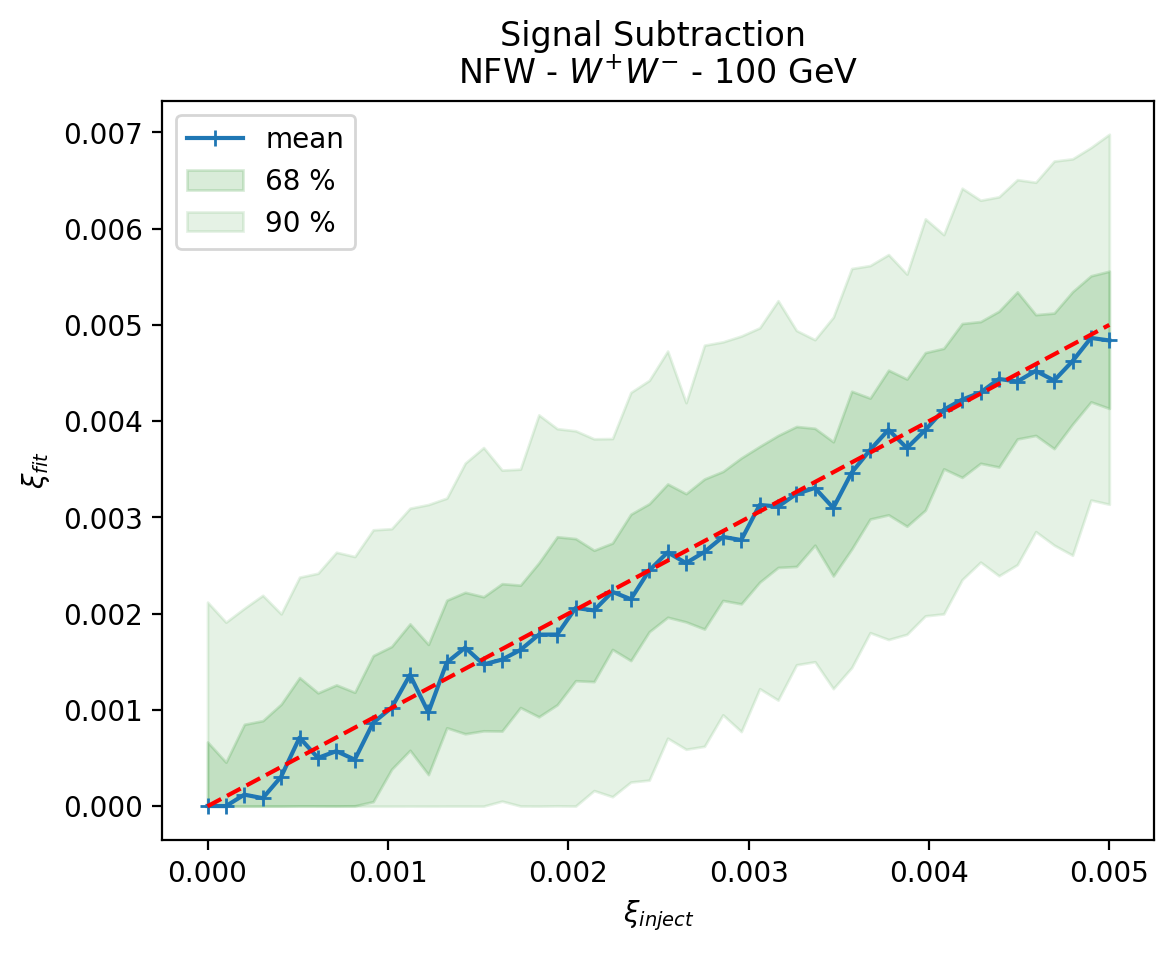

In [24]:
file = '/data/user/tchau/Sandbox/GC_OscNext/Sensitivity/SignalRecovery/WW_NFW_100.0GeV_MCfit1122_MCinj1122_llhSignalSub.pkl'
output = pkl.load(open(file, 'rb'))


f_inj = np.linspace(0, 0.005, 50)

plt.plot(f_inj, output['mean'], marker="+", label='mean')

plt.fill_between(f_inj, output['32'], output['68'], alpha=.15, color='green', label='68 %')
plt.fill_between(f_inj, output['10'], output['90'], alpha=.1, color='green', label='90 %')

plt.title('Signal Subtraction \n'+ r"NFW - $W^{+} W^{-}$" + " - 100 GeV")
plt.plot(f_inj, f_inj, color='red', ls='--')
# plt.xlim(0,0.002)
# plt.ylim(0,0.002)
plt.xlabel(r"$\xi_{inject}$")
plt.ylabel(r"$\xi_{fit}$")
plt.legend(loc=2)